#Mercedes Benz: Speed Recommendation Project by Mthobisi Latha

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder
import glob

*Dataset:*

Road Accidents due to Driver Violations(India)

Investigating Non-Adherence to Traffic Laws

By shri hkh [source]
https://www.kaggle.com/datasets/thedevastator/state-ut-wise-road-accidents-due-to-driver-viola


In [6]:
dataset_cols = ["stateut","region","regionID","alcintake", "overspeed", "signalvoid", "wrongside", "lanejumping", "overtaking", "asleep", "othercauses"]
df = pd.read_csv("driverresponse.csv").drop(["index", "sno", "alcintake2014" ,	"overspeed2014",	"overtaking2014",	"lanejumping2014" ,	"wrongside2014",	"asleep2014" 	,"othercause2014", "signalavoid2014"], axis=1)



In [7]:
df.columns = dataset_cols


In [8]:
df.head()

,stateut,region,regionID,alcintake,overspeed,signalvoid,wrongside,lanejumping,overtaking,asleep,othercauses
0,Andhra Pradesh,south,2,128,17286,40,667,325,1024,306,2868
1,Arunachal Pradesh,northeast,5,15,45,0,7,11,8,8,18
2,Assam,northeast,5,352,3520,64,334,156,371,3,873
3,Bihar,north,1,593,2323,8,458,156,573,122,612
4,Chhattisgarh,centre,9,145,6660,62,410,175,467,144,953


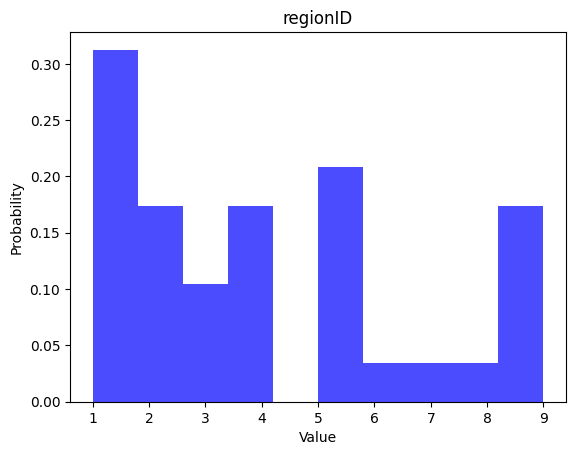

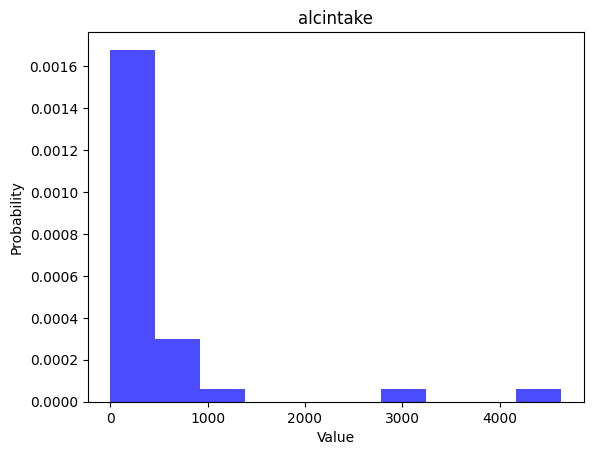

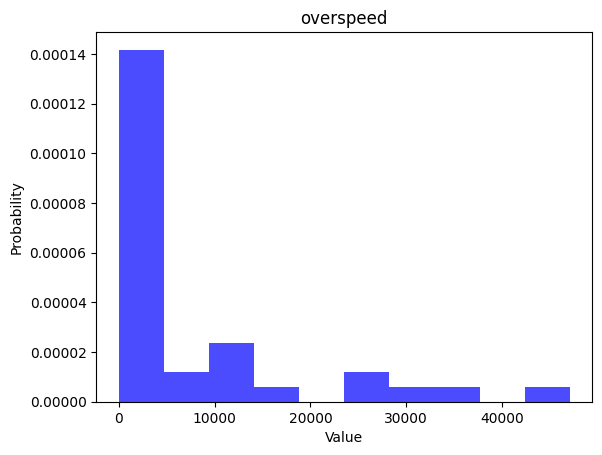

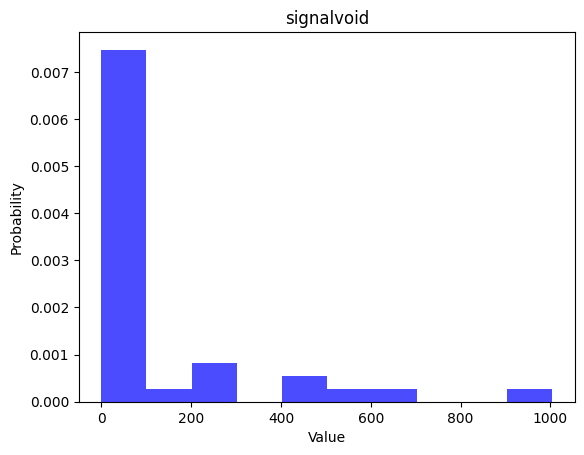

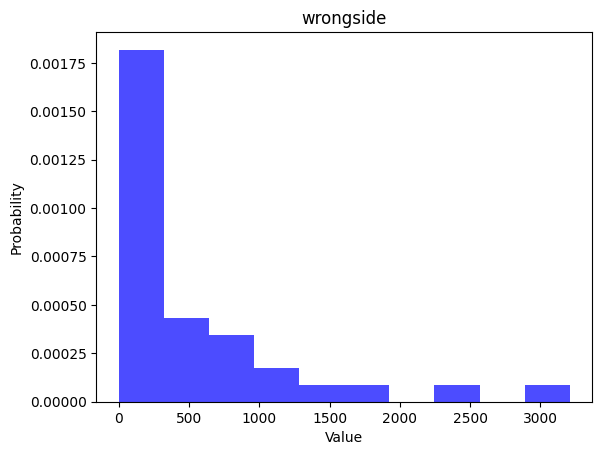

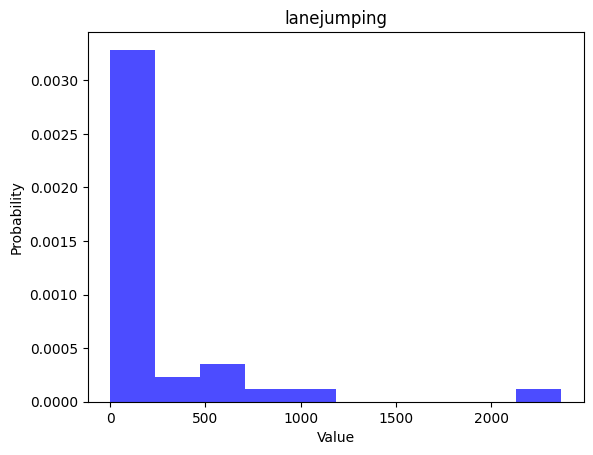

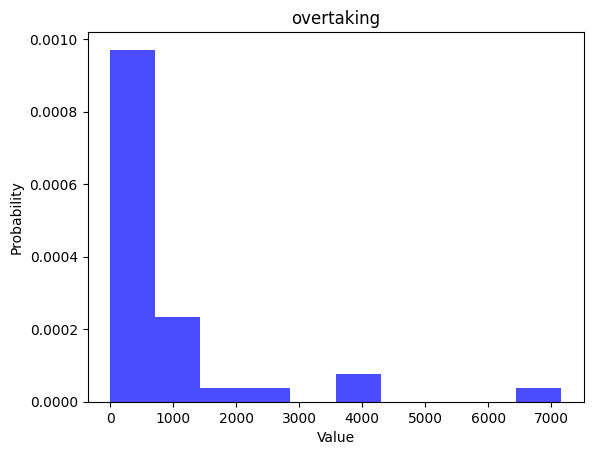

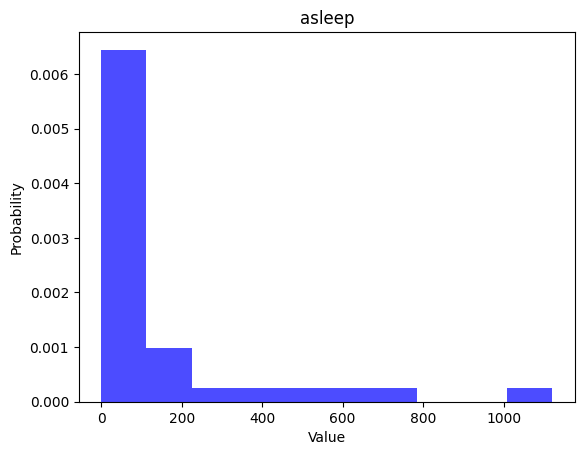

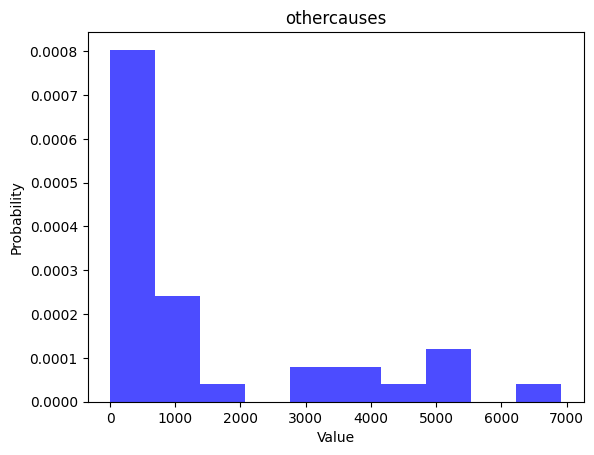

In [9]:
for label in df.select_dtypes(include='number').columns:
    plt.hist(df[label], color='blue', label='accidents', alpha=0.7, density=True)
    plt.title(label)
    plt.xlabel("Value")
    plt.ylabel("Probability")
    plt.show()


#Train, Validation and Test Datasets


In [10]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [11]:
def scale_dataset(dataframe, oversample = False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)


  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y


In [12]:

label_encoder = LabelEncoder()
train['stateut'] = label_encoder.fit_transform(train['stateut'])
train['region'] = label_encoder.fit_transform(train['region'])

valid['stateut'] = label_encoder.fit_transform(valid['stateut'])
valid['region'] = label_encoder.fit_transform(valid['region'])

test['stateut'] = label_encoder.fit_transform(test['stateut'])
test['region'] = label_encoder.fit_transform(test['region'])


In [13]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

#k-Nearest Neighbour


In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler


In [15]:
# Handle missing values if needed
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Convert the NumPy array to a Pandas DataFrame with appropriate column names
X_train_imputed_df = pd.DataFrame(X_train_imputed, columns=[f'feature_{i}' for i in range(X_train_imputed.shape[1])])

# Create and fit the KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train_imputed, y_train)

KNeighborsClassifier(n_neighbors=1)

In [16]:
y_pred = knn_model.predict(X_test_scaled)

In [17]:
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           7       1.00      0.00      0.00         1
          50       0.00      1.00      0.00         0
          70       0.00      1.00      0.00         0
         247       0.00      1.00      0.00         0
         953       1.00      0.00      0.00         1
        1375       1.00      0.00      0.00         1
        1392       0.00      1.00      0.00         0
        4093       1.00      0.00      0.00         1
        4866       0.00      1.00      0.00         0
        4955       1.00      0.00      0.00         1
        6915       1.00      0.00      0.00         1

    accuracy                           0.12         8
   macro avg       0.53      0.46      0.03         8
weighted avg       0.83      0.12      0.10         8



#Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB

In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)


nb_model = GaussianNB()
nb_model.fit(X_train_imputed, y_train)


GaussianNB()

In [20]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.25      1.00      0.40         2
           7       1.00      0.00      0.00         1
         953       1.00      0.00      0.00         1
        1375       1.00      0.00      0.00         1
        4093       1.00      0.00      0.00         1
        4955       1.00      0.00      0.00         1
        6915       1.00      0.00      0.00         1

    accuracy                           0.25         8
   macro avg       0.89      0.14      0.06         8
weighted avg       0.81      0.25      0.10         8



#Log Regression

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [23]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       2.0
           7       1.00      0.00      0.00       1.0
          18       0.00      1.00      0.00       0.0
          27       0.00      1.00      0.00       0.0
          50       0.00      1.00      0.00       0.0
          70       0.00      1.00      0.00       0.0
         193       0.00      1.00      0.00       0.0
         498       0.00      1.00      0.00       0.0
         953       1.00      0.00      0.00       1.0
        1375       1.00      0.00      0.00       1.0
        1392       0.00      1.00      0.00       0.0
        4093       1.00      0.00      0.00       1.0
        4955       1.00      0.00      0.00       1.0
        6915       1.00      0.00      0.00       1.0

    accuracy                           0.00       8.0
   macro avg       0.43      0.50      0.00       8.0
weighted avg       0.75      0.00      0.00       8.0



#Support-Vector Machine

In [24]:
from sklearn.svm import SVC

In [25]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [26]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       2.0
           7       1.00      0.00      0.00       1.0
          18       0.00      1.00      0.00       0.0
          50       0.00      1.00      0.00       0.0
          70       0.00      1.00      0.00       0.0
         193       0.00      1.00      0.00       0.0
         247       0.00      1.00      0.00       0.0
         953       1.00      0.00      0.00       1.0
        1375       1.00      0.00      0.00       1.0
        1392       0.00      1.00      0.00       0.0
        4093       1.00      0.00      0.00       1.0
        4955       1.00      0.00      0.00       1.0
        6915       1.00      0.00      0.00       1.0

    accuracy                           0.00       8.0
   macro avg       0.46      0.46      0.00       8.0
weighted avg       0.75      0.00      0.00       8.0



#Nueral Network

In [35]:
import tensorflow as tf

In [38]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2)
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  plt.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()


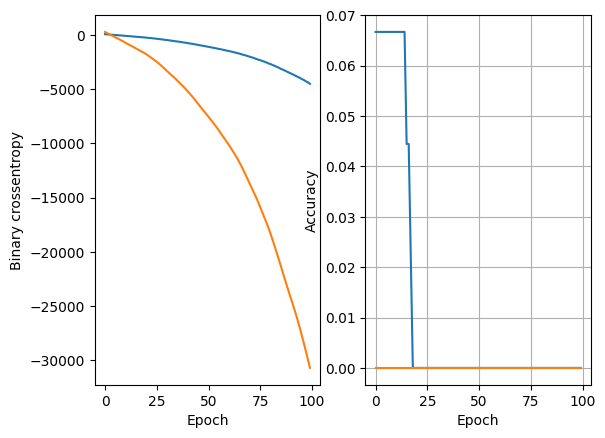

In [39]:
plot_history(history)

In [41]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0
  )

  return nn_model, history

16 nodes, dropout 0, lr0.01, batch_size 32


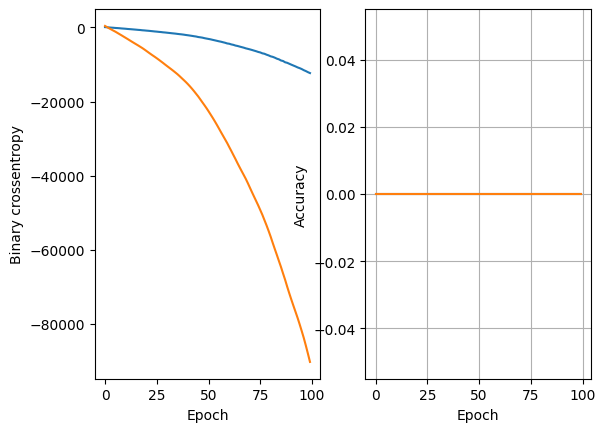

1/1 [==============================] - 0s 28ms/step - loss: -21159.3105 - accuracy: 0.0000e+00
16 nodes, dropout 0, lr0.01, batch_size 64


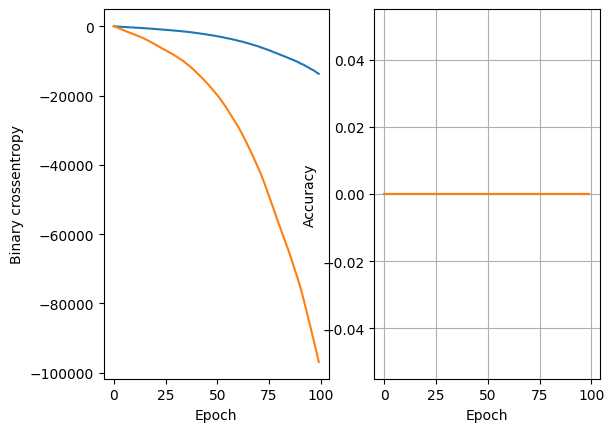

1/1 [==============================] - 0s 24ms/step - loss: -26293.5664 - accuracy: 0.0000e+00
16 nodes, dropout 0, lr0.01, batch_size 128


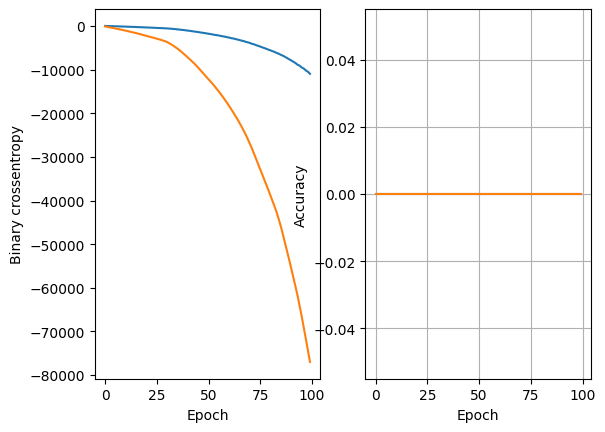

1/1 [==============================] - 0s 24ms/step - loss: -21249.1523 - accuracy: 0.0000e+00
16 nodes, dropout 0, lr0.005, batch_size 32


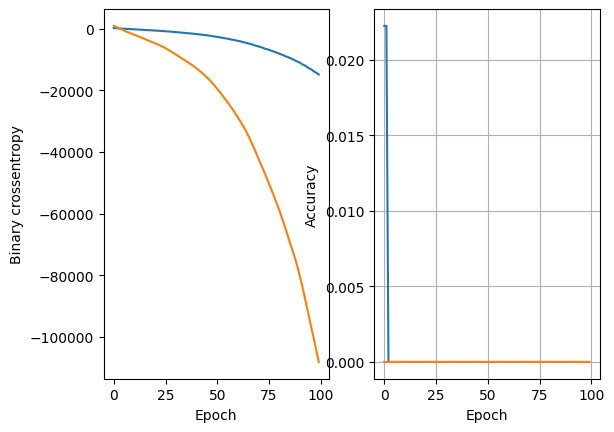

1/1 [==============================] - 0s 28ms/step - loss: -31007.7148 - accuracy: 0.0000e+00
16 nodes, dropout 0, lr0.005, batch_size 64


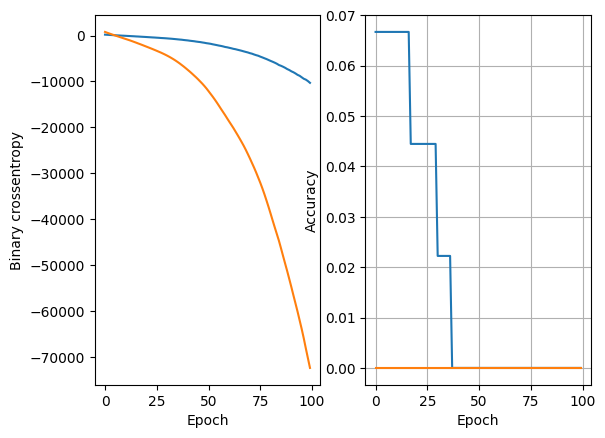

1/1 [==============================] - 0s 26ms/step - loss: -19876.4062 - accuracy: 0.0000e+00
16 nodes, dropout 0, lr0.005, batch_size 128


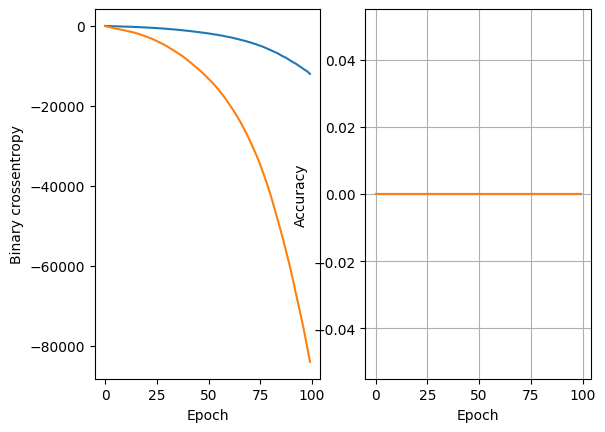

1/1 [==============================] - 0s 37ms/step - loss: -21700.6387 - accuracy: 0.0000e+00
16 nodes, dropout 0, lr0.001, batch_size 32


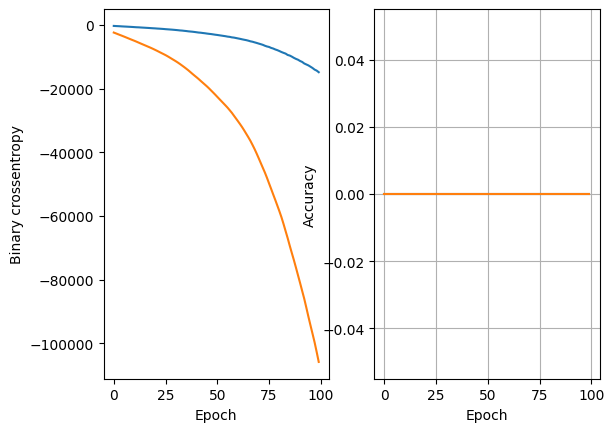

1/1 [==============================] - 0s 29ms/step - loss: -30566.9824 - accuracy: 0.0000e+00
16 nodes, dropout 0, lr0.001, batch_size 64


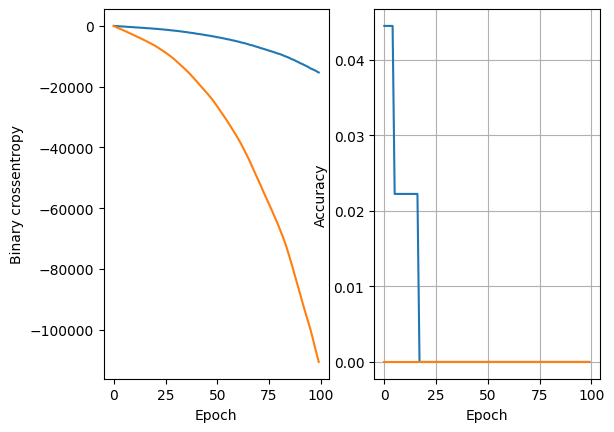

1/1 [==============================] - 0s 25ms/step - loss: -29847.3184 - accuracy: 0.0000e+00
16 nodes, dropout 0, lr0.001, batch_size 128


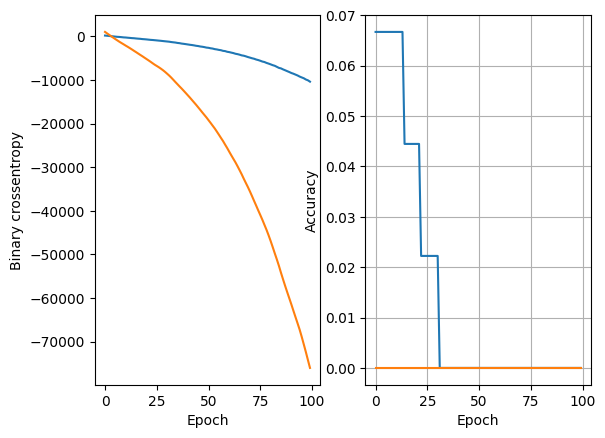

1/1 [==============================] - 0s 25ms/step - loss: -16979.1035 - accuracy: 0.0000e+00
16 nodes, dropout 0.2, lr0.01, batch_size 32


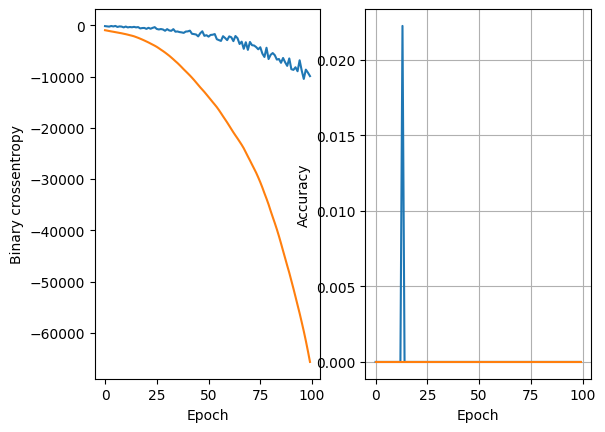

1/1 [==============================] - 0s 25ms/step - loss: -22893.2852 - accuracy: 0.0000e+00
16 nodes, dropout 0.2, lr0.01, batch_size 64


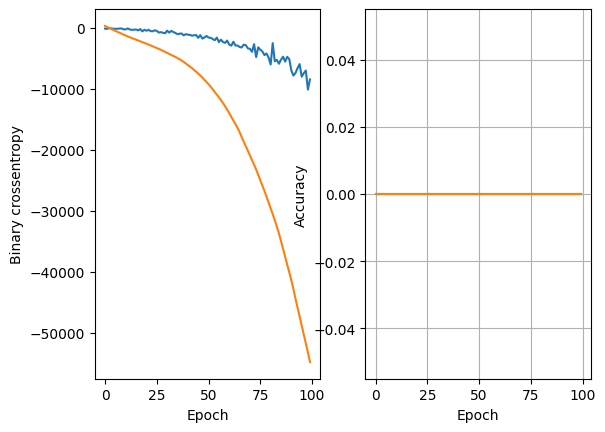

1/1 [==============================] - 0s 35ms/step - loss: -26082.4414 - accuracy: 0.0000e+00
16 nodes, dropout 0.2, lr0.01, batch_size 128


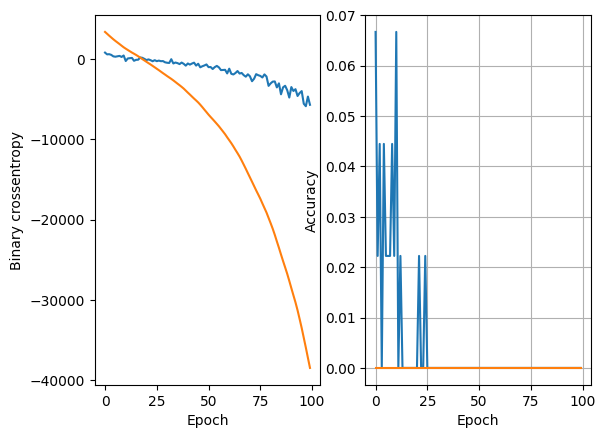

1/1 [==============================] - 0s 24ms/step - loss: -14113.2275 - accuracy: 0.0000e+00
16 nodes, dropout 0.2, lr0.005, batch_size 32


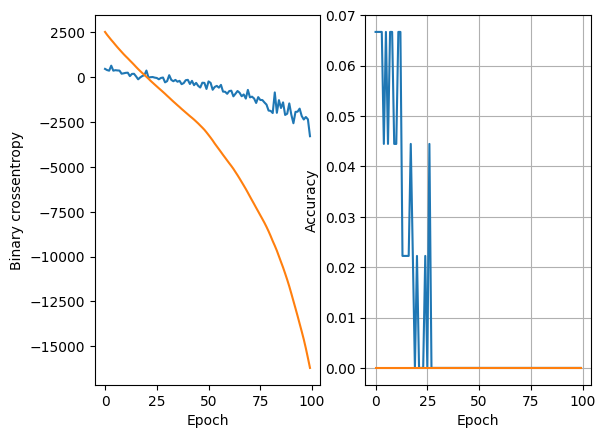

1/1 [==============================] - 0s 44ms/step - loss: -9785.1348 - accuracy: 0.0000e+00
16 nodes, dropout 0.2, lr0.005, batch_size 64


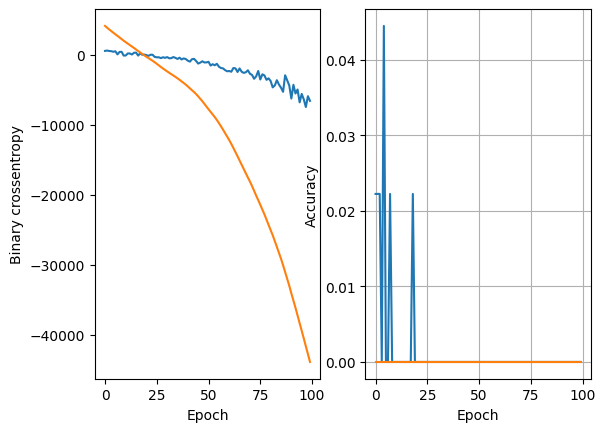

1/1 [==============================] - 0s 27ms/step - loss: -17941.0215 - accuracy: 0.0000e+00
16 nodes, dropout 0.2, lr0.005, batch_size 128


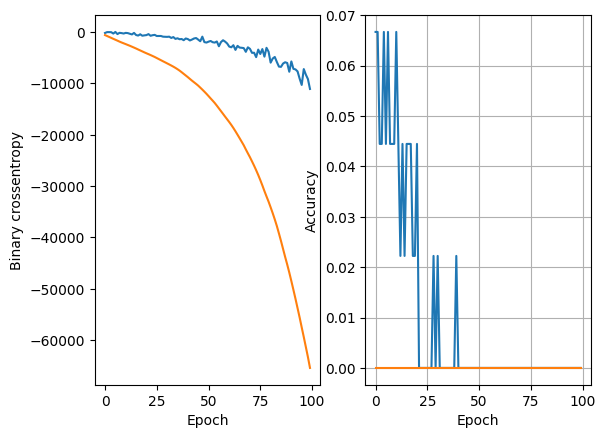

1/1 [==============================] - 0s 25ms/step - loss: -20356.4551 - accuracy: 0.0000e+00
16 nodes, dropout 0.2, lr0.001, batch_size 32


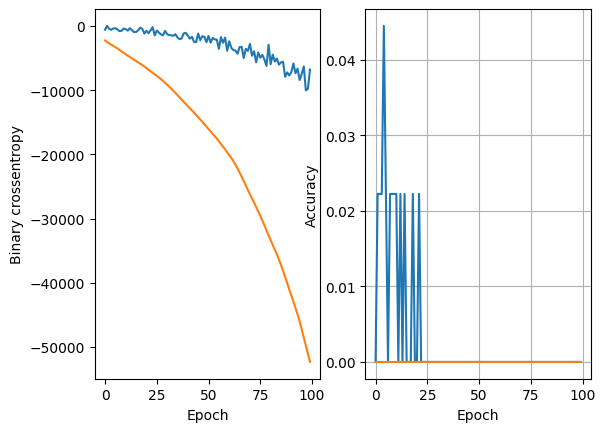

1/1 [==============================] - 0s 25ms/step - loss: -23074.3594 - accuracy: 0.0000e+00
16 nodes, dropout 0.2, lr0.001, batch_size 64


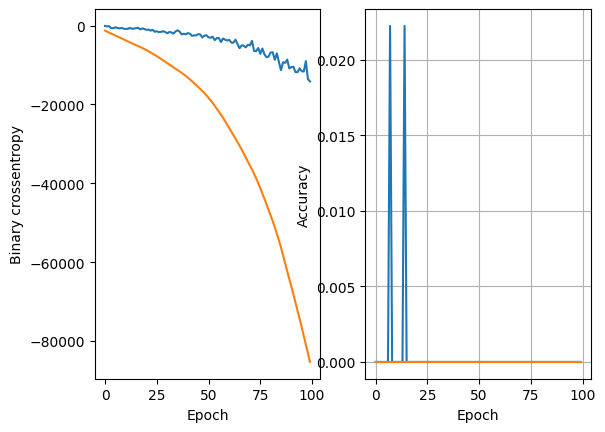

1/1 [==============================] - 0s 23ms/step - loss: -31742.1367 - accuracy: 0.0000e+00
16 nodes, dropout 0.2, lr0.001, batch_size 128


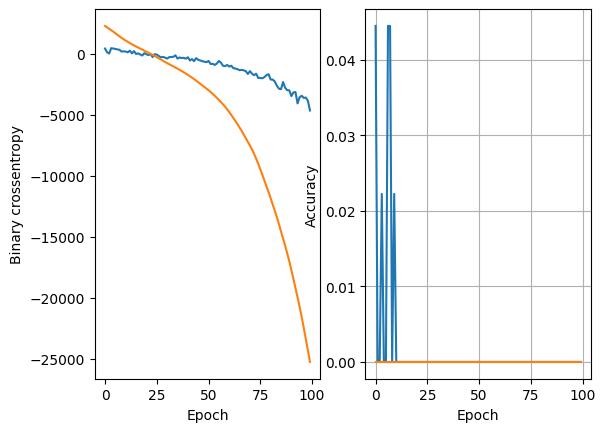

1/1 [==============================] - 0s 45ms/step - loss: -17539.3691 - accuracy: 0.0000e+00
32 nodes, dropout 0, lr0.01, batch_size 32


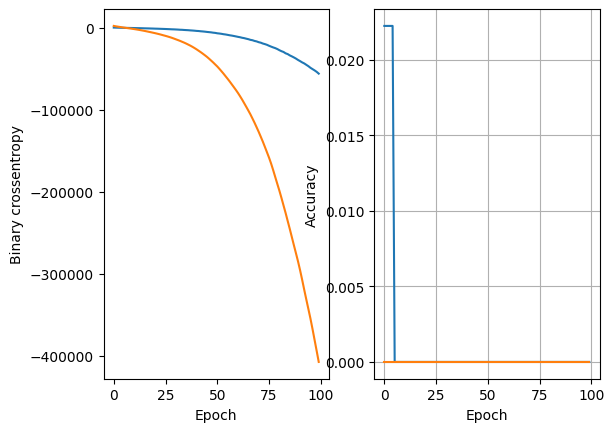

1/1 [==============================] - 0s 41ms/step - loss: -108416.9141 - accuracy: 0.0000e+00
32 nodes, dropout 0, lr0.01, batch_size 64


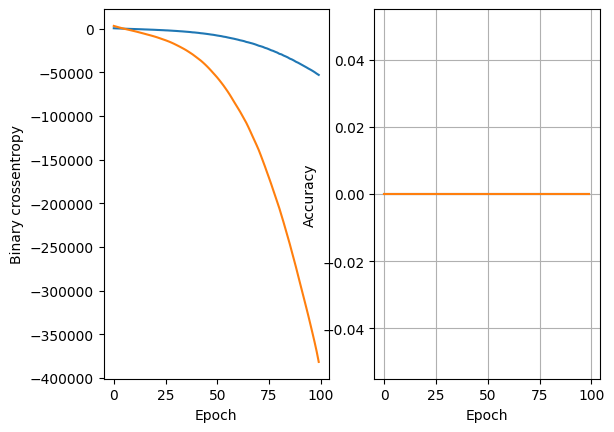

1/1 [==============================] - 0s 25ms/step - loss: -95950.4531 - accuracy: 0.0000e+00
32 nodes, dropout 0, lr0.01, batch_size 128


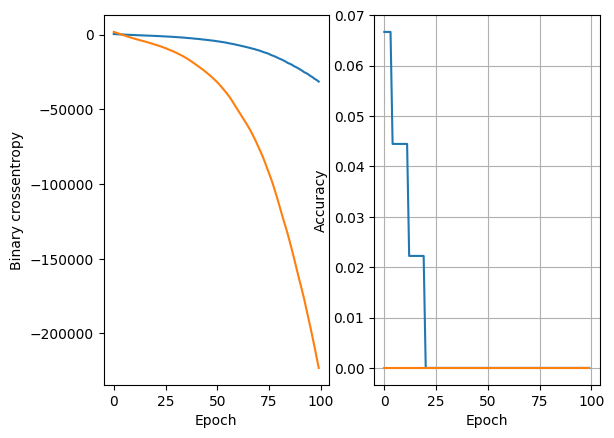

1/1 [==============================] - 0s 28ms/step - loss: -64212.3789 - accuracy: 0.0000e+00
32 nodes, dropout 0, lr0.005, batch_size 32


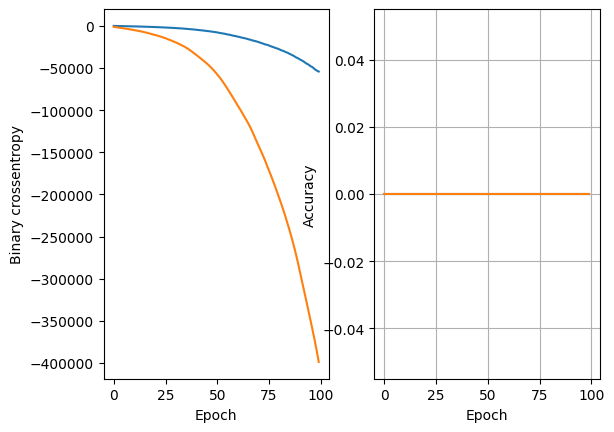

1/1 [==============================] - 0s 24ms/step - loss: -95617.5078 - accuracy: 0.0000e+00
32 nodes, dropout 0, lr0.005, batch_size 64


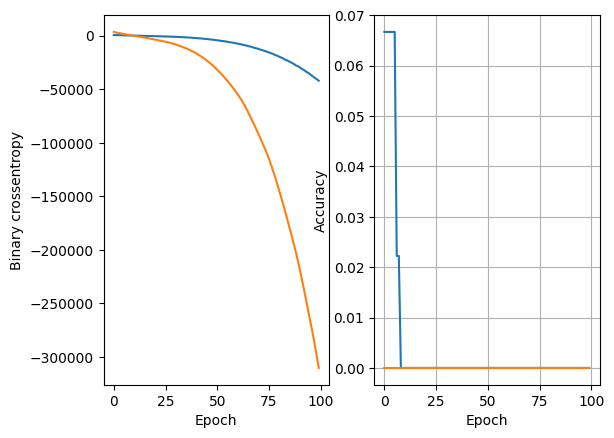

1/1 [==============================] - 0s 34ms/step - loss: -75499.9375 - accuracy: 0.0000e+00
32 nodes, dropout 0, lr0.005, batch_size 128


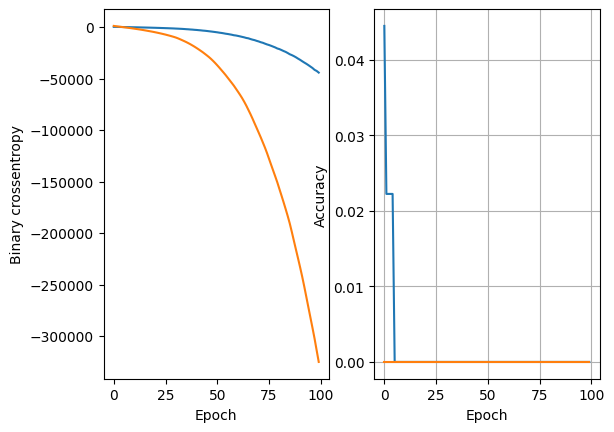

1/1 [==============================] - 0s 28ms/step - loss: -78068.6172 - accuracy: 0.0000e+00
32 nodes, dropout 0, lr0.001, batch_size 32


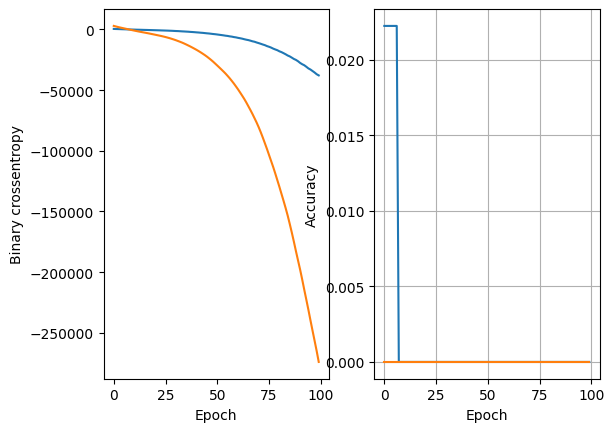

1/1 [==============================] - 0s 25ms/step - loss: -75770.0781 - accuracy: 0.0000e+00
32 nodes, dropout 0, lr0.001, batch_size 64


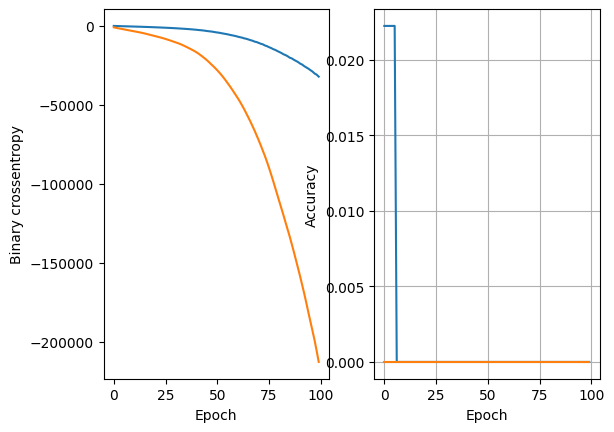

1/1 [==============================] - 0s 35ms/step - loss: -83389.5234 - accuracy: 0.0000e+00
32 nodes, dropout 0, lr0.001, batch_size 128


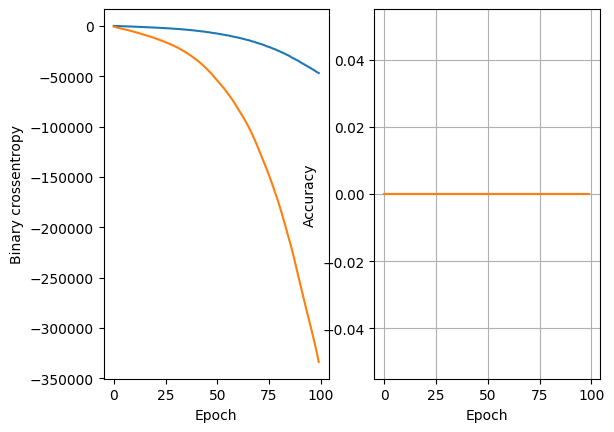

1/1 [==============================] - 0s 26ms/step - loss: -99566.8594 - accuracy: 0.0000e+00
32 nodes, dropout 0.2, lr0.01, batch_size 32


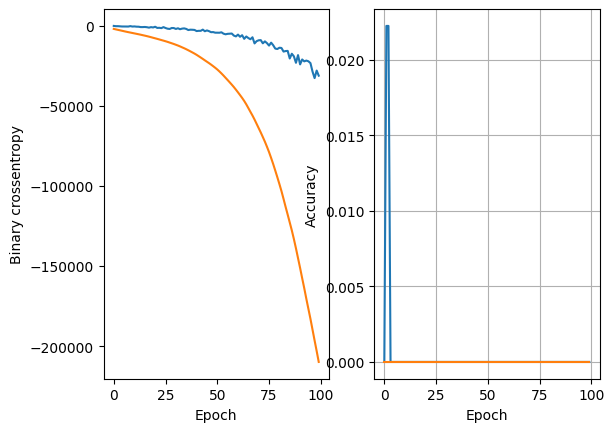

1/1 [==============================] - 0s 40ms/step - loss: -74595.3281 - accuracy: 0.0000e+00
32 nodes, dropout 0.2, lr0.01, batch_size 64


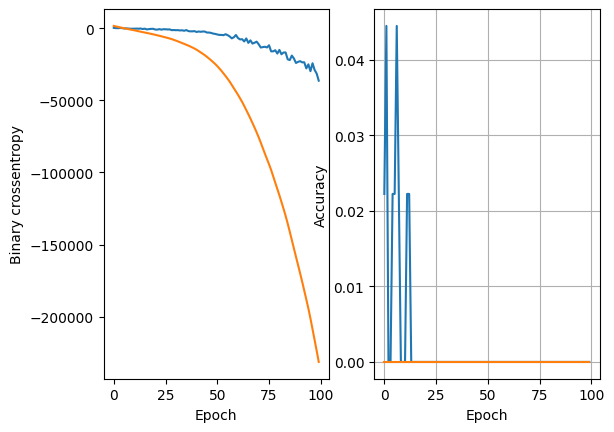

1/1 [==============================] - 0s 26ms/step - loss: -71462.7266 - accuracy: 0.0000e+00
32 nodes, dropout 0.2, lr0.01, batch_size 128


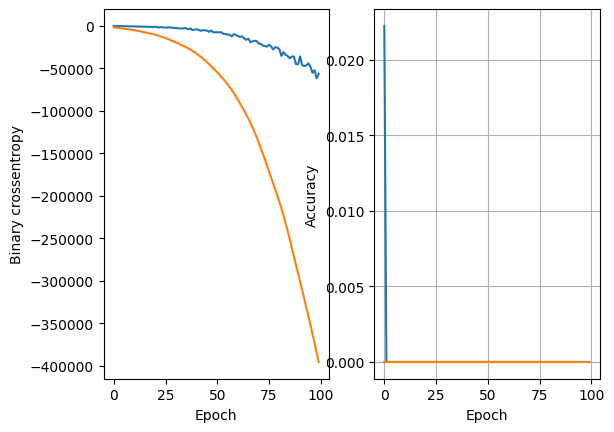

1/1 [==============================] - 0s 27ms/step - loss: -106010.0469 - accuracy: 0.0000e+00
32 nodes, dropout 0.2, lr0.005, batch_size 32


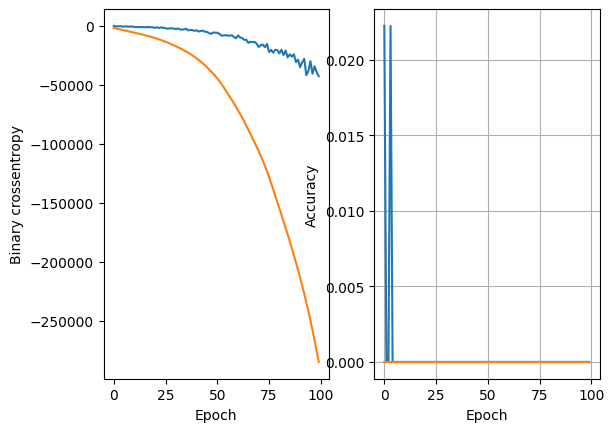

1/1 [==============================] - 0s 23ms/step - loss: -84364.6484 - accuracy: 0.0000e+00
32 nodes, dropout 0.2, lr0.005, batch_size 64


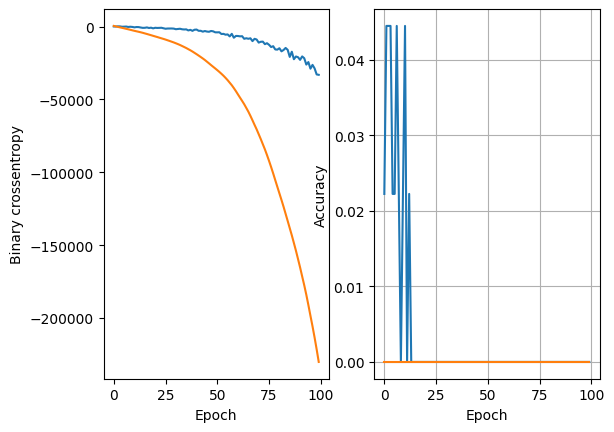

1/1 [==============================] - 0s 25ms/step - loss: -66777.0547 - accuracy: 0.0000e+00
32 nodes, dropout 0.2, lr0.005, batch_size 128


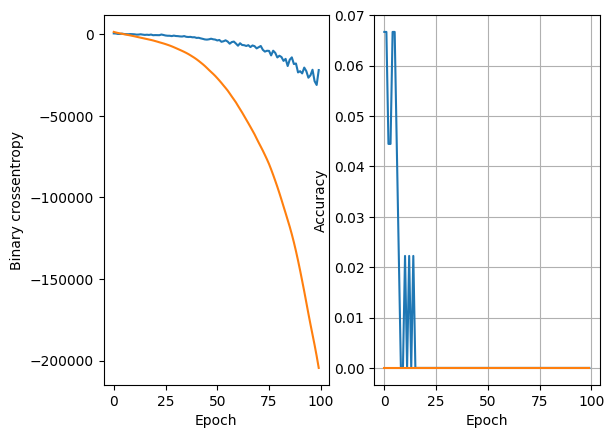

1/1 [==============================] - 0s 27ms/step - loss: -54919.3008 - accuracy: 0.0000e+00
32 nodes, dropout 0.2, lr0.001, batch_size 32


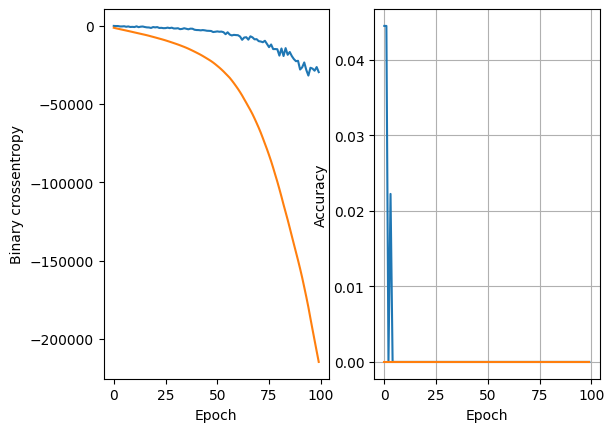

1/1 [==============================] - 0s 32ms/step - loss: -75171.7422 - accuracy: 0.0000e+00
32 nodes, dropout 0.2, lr0.001, batch_size 64


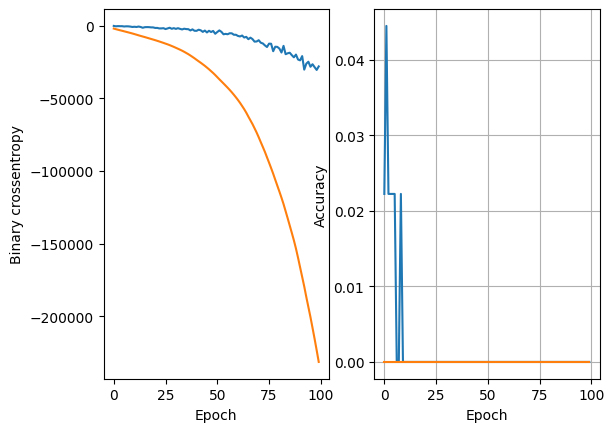

1/1 [==============================] - 0s 30ms/step - loss: -66544.1641 - accuracy: 0.0000e+00
32 nodes, dropout 0.2, lr0.001, batch_size 128


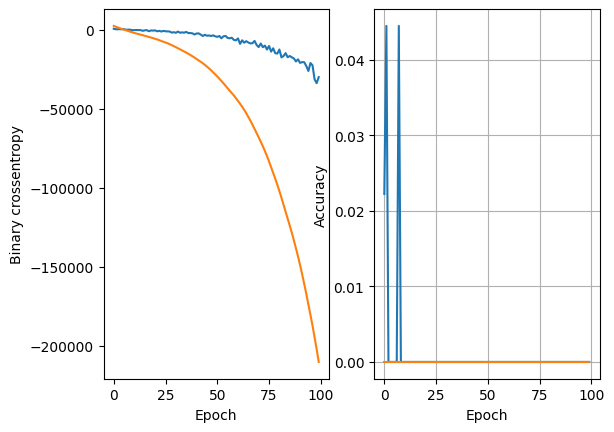

1/1 [==============================] - 0s 30ms/step - loss: -55849.7578 - accuracy: 0.0000e+00
64 nodes, dropout 0, lr0.01, batch_size 32


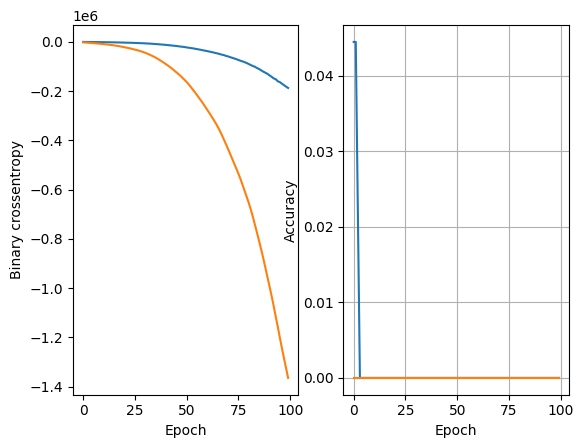

1/1 [==============================] - 0s 24ms/step - loss: -325894.9375 - accuracy: 0.0000e+00
64 nodes, dropout 0, lr0.01, batch_size 64


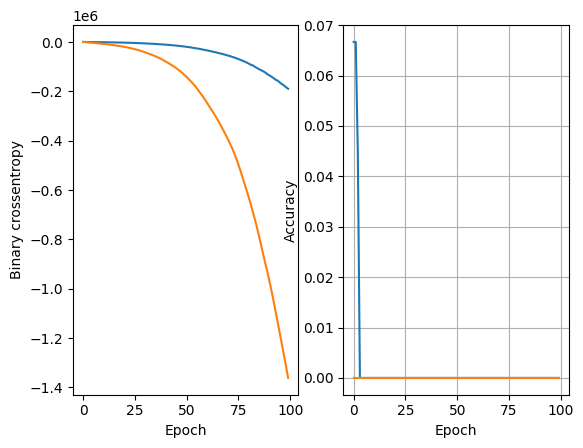

1/1 [==============================] - 0s 24ms/step - loss: -347176.8125 - accuracy: 0.0000e+00
64 nodes, dropout 0, lr0.01, batch_size 128


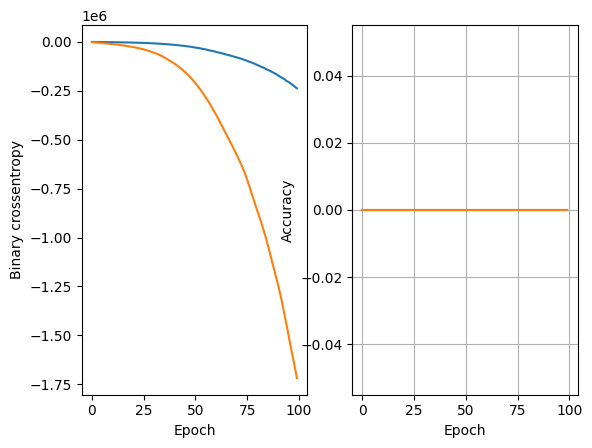

1/1 [==============================] - 0s 26ms/step - loss: -408503.8125 - accuracy: 0.0000e+00
64 nodes, dropout 0, lr0.005, batch_size 32


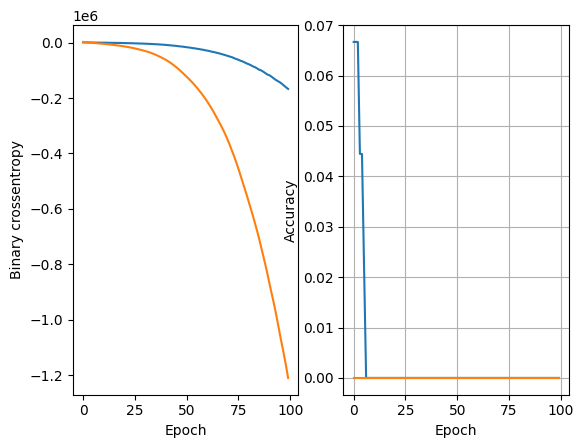

1/1 [==============================] - 0s 25ms/step - loss: -306228.3438 - accuracy: 0.0000e+00
64 nodes, dropout 0, lr0.005, batch_size 64


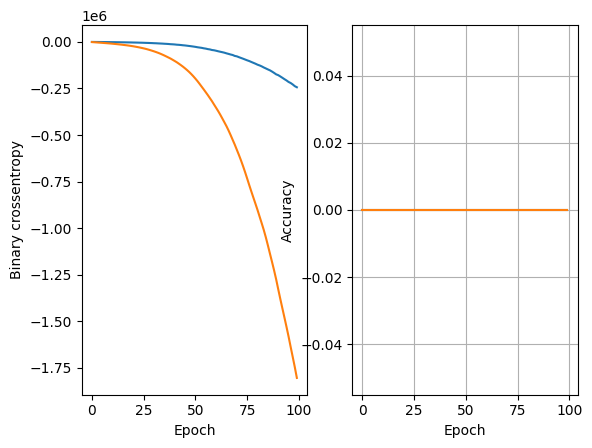

1/1 [==============================] - 0s 24ms/step - loss: -400695.4062 - accuracy: 0.0000e+00
64 nodes, dropout 0, lr0.005, batch_size 128


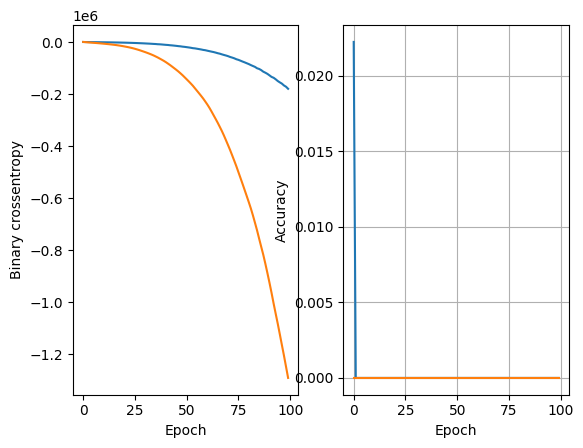

1/1 [==============================] - 0s 43ms/step - loss: -314841.5000 - accuracy: 0.0000e+00
64 nodes, dropout 0, lr0.001, batch_size 32


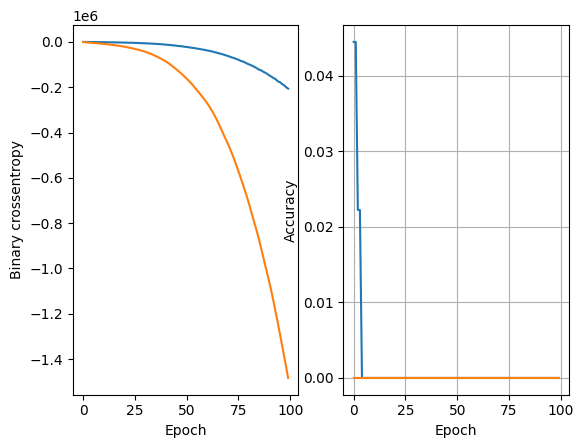

1/1 [==============================] - 0s 23ms/step - loss: -361969.0312 - accuracy: 0.0000e+00
64 nodes, dropout 0, lr0.001, batch_size 64


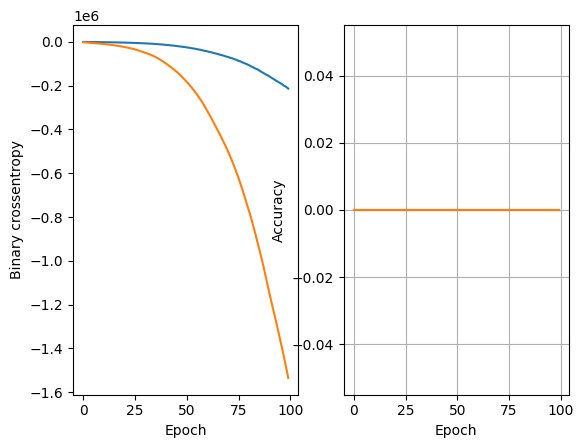

1/1 [==============================] - 0s 24ms/step - loss: -376519.5938 - accuracy: 0.0000e+00
64 nodes, dropout 0, lr0.001, batch_size 128


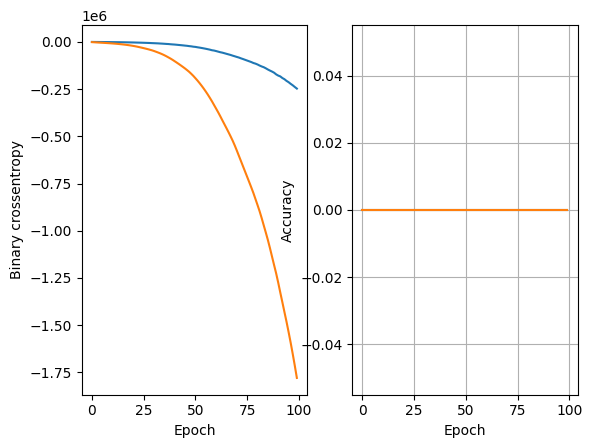

1/1 [==============================] - 0s 24ms/step - loss: -438238.1562 - accuracy: 0.0000e+00
64 nodes, dropout 0.2, lr0.01, batch_size 32


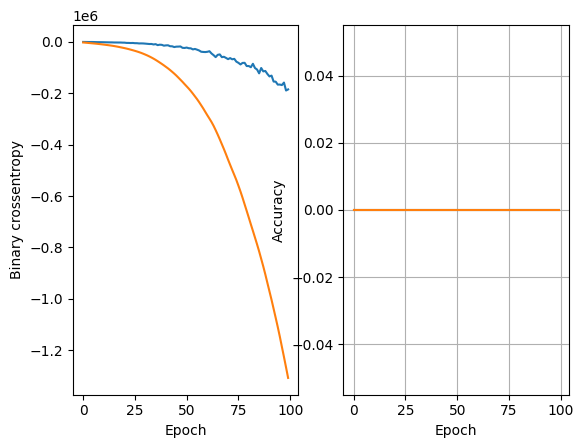

1/1 [==============================] - 0s 25ms/step - loss: -338757.3125 - accuracy: 0.0000e+00
64 nodes, dropout 0.2, lr0.01, batch_size 64


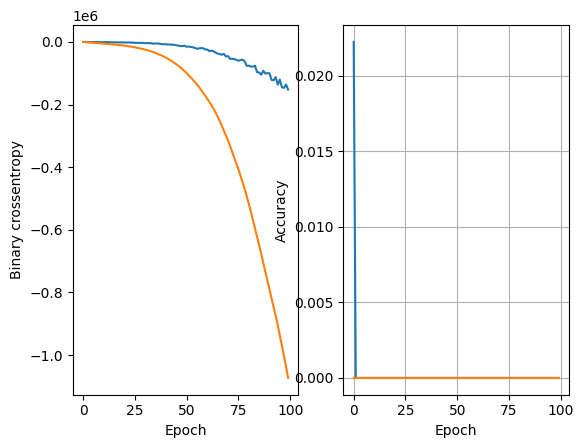

1/1 [==============================] - 0s 26ms/step - loss: -294984.5938 - accuracy: 0.0000e+00
64 nodes, dropout 0.2, lr0.01, batch_size 128


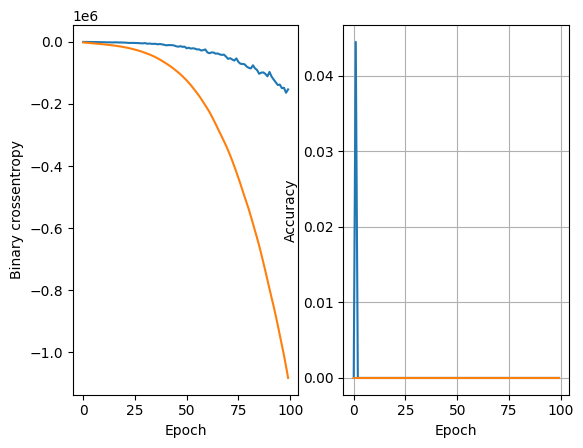

1/1 [==============================] - 0s 24ms/step - loss: -326247.9375 - accuracy: 0.0000e+00
64 nodes, dropout 0.2, lr0.005, batch_size 32


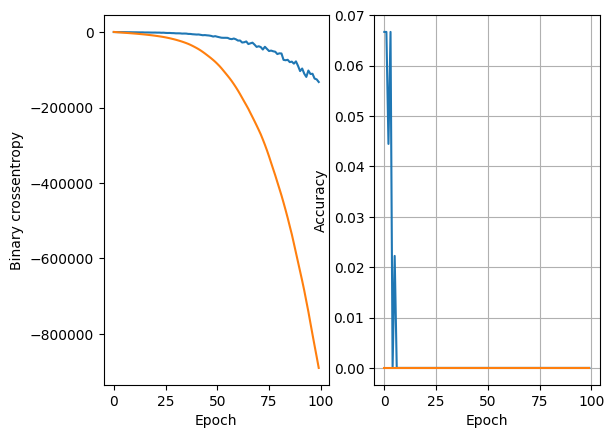

1/1 [==============================] - 0s 25ms/step - loss: -285675.4062 - accuracy: 0.0000e+00
64 nodes, dropout 0.2, lr0.005, batch_size 64


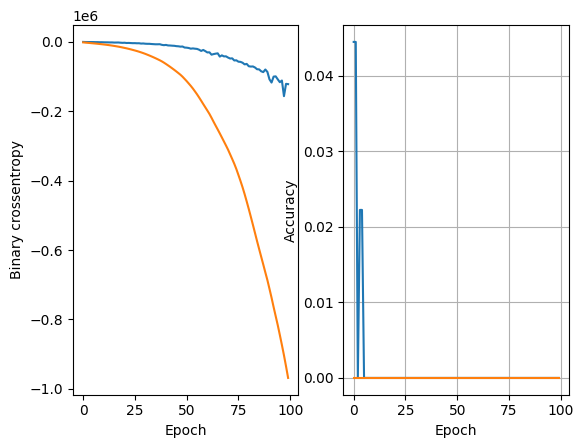

1/1 [==============================] - 0s 24ms/step - loss: -284265.8750 - accuracy: 0.0000e+00
64 nodes, dropout 0.2, lr0.005, batch_size 128


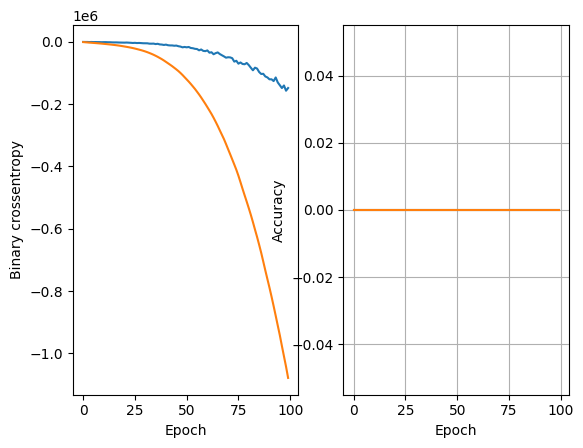

1/1 [==============================] - 0s 26ms/step - loss: -333885.3125 - accuracy: 0.0000e+00
64 nodes, dropout 0.2, lr0.001, batch_size 32


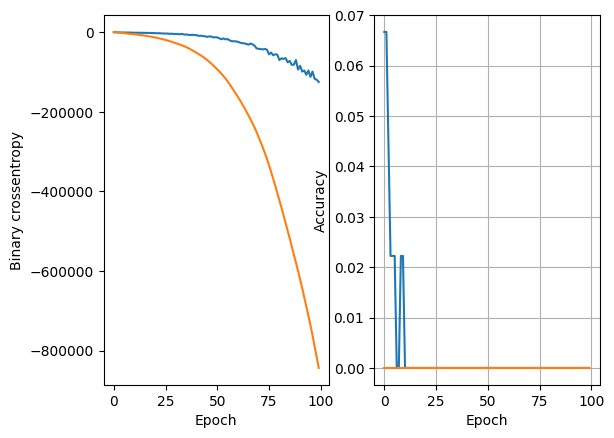

1/1 [==============================] - 0s 25ms/step - loss: -260841.8594 - accuracy: 0.0000e+00
64 nodes, dropout 0.2, lr0.001, batch_size 64


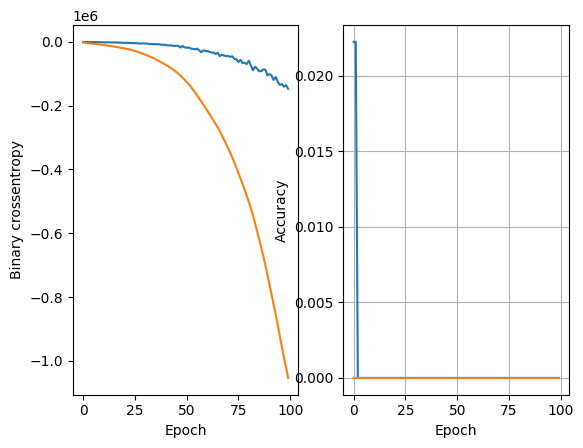

1/1 [==============================] - 0s 24ms/step - loss: -288857.4062 - accuracy: 0.0000e+00
64 nodes, dropout 0.2, lr0.001, batch_size 128


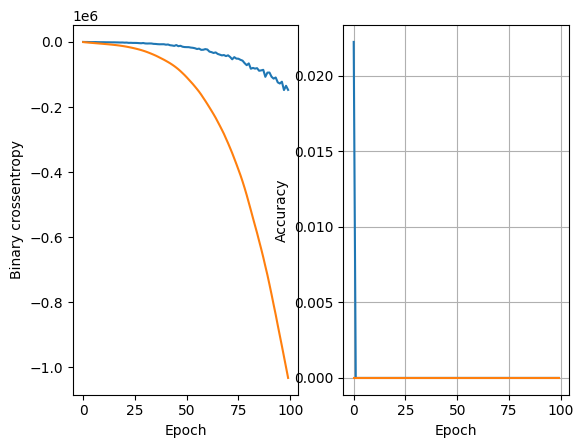

1/1 [==============================] - 0s 26ms/step - loss: -295147.8750 - accuracy: 0.0000e+00


In [44]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr{lr}, batch_size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)


        val_loss, val_accuracy = model.evaluate(X_valid, y_valid)

        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model




In [46]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

1/1 [==============================] - 0s 31ms/step


In [47]:
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00       2.0
           1       0.00      1.00      0.00       0.0
           7       1.00      0.00      0.00       1.0
         953       1.00      0.00      0.00       1.0
        1375       1.00      0.00      0.00       1.0
        4093       1.00      0.00      0.00       1.0
        4955       1.00      0.00      0.00       1.0
        6915       1.00      0.00      0.00       1.0

    accuracy                           0.00       8.0
   macro avg       0.88      0.12      0.00       8.0
weighted avg       1.00      0.00      0.00       8.0

